In [1965]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import AR
from scipy import stats
from pandas import to_datetime

def addZero(symbol):#该函数负责将股票代码前面的0补全
    if(len(symbol)==1):
        return "00000"+symbol
    if(len(symbol)==2):
        return "0000"+symbol
    if(len(symbol)==3):
        return "000"+symbol
    if(len(symbol)==4):
        return "00"+symbol
    if(len(symbol)==5):
        return "0"+symbol
    if(len(symbol)==6):
        return symbol
    
def plotsymbol(symbol,x,y):#画出代码为symbol的股票的图，x可以为日期，y可以为营收，利润等
    plt.plot(Income.loc[Income['TICKER_SYMBOL']==symbol][x],Income.loc[Income['TICKER_SYMBOL']==symbol][y])
    
def isContinuous(t):
    if (t.dtype!='datetime64[ns]'):
        raise "t must be 'datetime64[ns]'"
        return
    if t.size==pd.date_range(t.min(),t.max(),freq='Q').size:
        return True
    else:
        return False

Income=pd.read_excel("C:/FDDC_financial_data/FDDC_financial_data/Financial Data/Income Statement.xls",sheet_name="General Business")

In [1966]:
#将股票代码变为字符串型
Income['TICKER_SYMBOL']=Income['TICKER_SYMBOL'].astype(str)
#股票代码加0
Income['TICKER_SYMBOL']=Income['TICKER_SYMBOL'].apply(addZero)
#将END_DATE转变为日期类型
Income['END_DATE']=pd.to_datetime(Income['END_DATE'],format='%Y-%m-%d')
Income=Income.loc[:,['END_DATE','TICKER_SYMBOL','REVENUE']]
Income=Income.sort_values(by=['END_DATE', 'TICKER_SYMBOL'])

In [1967]:
Income[['TICKER_SYMBOL','END_DATE']].duplicated().sum()

97281

In [1968]:
#观察重复值的样本，可以发现第二次重复的值有了新的值，可能是报告期补充了新的数据，
Income[(Income['TICKER_SYMBOL']=='000002')&(Income['END_DATE']=='2009-03-31')]

,END_DATE,TICKER_SYMBOL,REVENUE
940,2009-03-31,000002,8.164319e+09
1106,2009-03-31,000002,8.164319e+09


In [1969]:
Income=Income.drop_duplicates(['END_DATE','TICKER_SYMBOL'],keep='last')
print ("处理后的数据有%d行，%d列"%(Income.shape[0],Income.shape[1]))

处理后的数据有110852行，3列


In [1970]:
#观察同一只股票的同一期，是否还有重复值
Income[['TICKER_SYMBOL','END_DATE']].duplicated().sum()

0

In [1971]:
#改变为日期类型index
Income.index=Income['END_DATE']
Income=Income.drop('END_DATE',axis=1)
Income.head()
train=Income
Income=[]
train.head()

,TICKER_SYMBOL,REVENUE
END_DATE,,
2006-12-31,002282,2.836519e+08
2006-12-31,002283,4.875759e+08
2006-12-31,002284,6.513598e+08
2006-12-31,002285,3.443315e+08
2006-12-31,002286,2.573427e+08


In [1972]:
symbol_discontinuous=[]
symbol_continuous=[]
for symbol in train['TICKER_SYMBOL'].unique():
    if (isContinuous(train[train['TICKER_SYMBOL']==symbol].index)==False):
        symbol_discontinuous.append(symbol)
        print ("%s的时间序列不连续"%symbol)
    else:
        symbol_continuous.append(symbol)

#for symbol in symbol_continuous:
#    train=train.append(Income[Income['TICKER_SYMBOL']==symbol])
    
#for symbol in symbol_discontinuous:
#    temp=Income[Income['TICKER_SYMBOL']==symbol]
#    new_index=pd.date_range(temp.index.min(),temp.index.max(),freq='Q')
#    new_index.strftime('%Y-%m-%d')
#    temp=temp.reindex(new_index)
#    temp.END_DATE=temp.index
#    temp.TICKER_SYMBOL=symbol
#    train=train.append(temp)


002282的时间序列不连续
002283的时间序列不连续
002284的时间序列不连续
002285的时间序列不连续
002286的时间序列不连续
002287的时间序列不连续
002288的时间序列不连续
002289的时间序列不连续
002290的时间序列不连续
002291的时间序列不连续
002292的时间序列不连续
002293的时间序列不连续
002294的时间序列不连续
002295的时间序列不连续
002296的时间序列不连续
002297的时间序列不连续
002298的时间序列不连续
002299的时间序列不连续
002300的时间序列不连续
002301的时间序列不连续
002302的时间序列不连续
002303的时间序列不连续
002304的时间序列不连续
002305的时间序列不连续
002306的时间序列不连续
002307的时间序列不连续
002308的时间序列不连续
002309的时间序列不连续
002310的时间序列不连续
002311的时间序列不连续
002312的时间序列不连续
002313的时间序列不连续
002314的时间序列不连续
002315的时间序列不连续
002316的时间序列不连续
002317的时间序列不连续
002318的时间序列不连续
002319的时间序列不连续
002320的时间序列不连续
002321的时间序列不连续
002322的时间序列不连续
002323的时间序列不连续
002324的时间序列不连续
002325的时间序列不连续
002326的时间序列不连续
002327的时间序列不连续
002328的时间序列不连续
002329的时间序列不连续
002330的时间序列不连续
002331的时间序列不连续
002332的时间序列不连续
002333的时间序列不连续
002334的时间序列不连续
002335的时间序列不连续
002336的时间序列不连续
002337的时间序列不连续
002338的时间序列不连续
002339的时间序列不连续
002340的时间序列不连续
002341的时间序列不连续
002342的时间序列不连续
002343的时间序列不连续
002344的时间序列不连续
002345的时间序列不连续
002346的时间序列不连续
002347的时间序列不连续
002348的时间序

601890的时间序列不连续
601933的时间序列不连续
601985的时间序列不连续
601992的时间序列不连续
601996的时间序列不连续
000627的时间序列不连续
000693的时间序列不连续
000722的时间序列不连续
600094的时间序列不连续
601668的时间序列不连续
300444的时间序列不连续
600050的时间序列不连续
002562的时间序列不连续
002568的时间序列不连续
002572的时间序列不连续
002573的时间序列不连续
002574的时间序列不连续
002575的时间序列不连续
002577的时间序列不连续
002578的时间序列不连续
002579的时间序列不连续
002580的时间序列不连续
002582的时间序列不连续
002583的时间序列不连续
002584的时间序列不连续
002585的时间序列不连续
002586的时间序列不连续
002587的时间序列不连续
002588的时间序列不连续
002589的时间序列不连续
002590的时间序列不连续
002592的时间序列不连续
002594的时间序列不连续
002596的时间序列不连续
002597的时间序列不连续
002598的时间序列不连续
002599的时间序列不连续
002600的时间序列不连续
002601的时间序列不连续
002602的时间序列不连续
002603的时间序列不连续
002604的时间序列不连续
002605的时间序列不连续
002607的时间序列不连续
002608的时间序列不连续
002610的时间序列不连续
002611的时间序列不连续
002612的时间序列不连续
002616的时间序列不连续
002617的时间序列不连续
002618的时间序列不连续
002619的时间序列不连续
002620的时间序列不连续
002621的时间序列不连续
002623的时间序列不连续
002624的时间序列不连续
002625的时间序列不连续
002626的时间序列不连续
002627的时间序列不连续
002628的时间序列不连续
002629的时间序列不连续
002631的时间序列不连续
002632的时间序列不连续
002633的时间序列不连续
002634的时间序列不连续
002635的时间序列不连续
002636的时间序

002767的时间序列不连续
002768的时间序列不连续
002770的时间序列不连续
002771的时间序列不连续
002772的时间序列不连续
002775的时间序列不连续
002776的时间序列不连续
002777的时间序列不连续
002779的时间序列不连续
002780的时间序列不连续
002781的时间序列不连续
002785的时间序列不连续
002786的时间序列不连续
002788的时间序列不连续
002789的时间序列不连续
002790的时间序列不连续
002791的时间序列不连续
300394的时间序列不连续
300404的时间序列不连续
300414的时间序列不连续
300422的时间序列不连续
300423的时间序列不连续
300426的时间序列不连续
300427的时间序列不连续
300428的时间序列不连续
300430的时间序列不连续
300431的时间序列不连续
300432的时间序列不连续
300433的时间序列不连续
300434的时间序列不连续
300436的时间序列不连续
300438的时间序列不连续
300439的时间序列不连续
300440的时间序列不连续
300441的时间序列不连续
300443的时间序列不连续
300446的时间序列不连续
300447的时间序列不连续
300448的时间序列不连续
300449的时间序列不连续
300450的时间序列不连续
300451的时间序列不连续
300452的时间序列不连续
300453的时间序列不连续
300455的时间序列不连续
300456的时间序列不连续
300457的时间序列不连续
300458的时间序列不连续
300459的时间序列不连续
300460的时间序列不连续
300461的时间序列不连续
300462的时间序列不连续
300463的时间序列不连续
300464的时间序列不连续
300465的时间序列不连续
300466的时间序列不连续
300467的时间序列不连续
300468的时间序列不连续
300469的时间序列不连续
300470的时间序列不连续
300471的时间序列不连续
300472的时间序列不连续
300473的时间序列不连续
300475的时间序列不连续
300476的时间序列不连续
300478的时间序列不连续
300479的时间序

300695的时间序列不连续
300696的时间序列不连续
300697的时间序列不连续
300698的时间序列不连续
300699的时间序列不连续
300700的时间序列不连续
300701的时间序列不连续
300702的时间序列不连续
300703的时间序列不连续
300705的时间序列不连续
300706的时间序列不连续
300707的时间序列不连续
300708的时间序列不连续
300709的时间序列不连续
300710的时间序列不连续
300711的时间序列不连续
300712的时间序列不连续
300713的时间序列不连续
300715的时间序列不连续
300716的时间序列不连续
300717的时间序列不连续
300718的时间序列不连续
300719的时间序列不连续
300720的时间序列不连续
300721的时间序列不连续
300722的时间序列不连续
300723的时间序列不连续
300725的时间序列不连续
300726的时间序列不连续
300727的时间序列不连续
300728的时间序列不连续
300729的时间序列不连续
300730的时间序列不连续
300731的时间序列不连续
300732的时间序列不连续
300733的时间序列不连续
300735的时间序列不连续
300736的时间序列不连续
300737的时间序列不连续
300738的时间序列不连续
300739的时间序列不连续
600025的时间序列不连续
600933的时间序列不连续
601019的时间序列不连续
601086的时间序列不连续
601366的时间序列不连续
601619的时间序列不连续
601828的时间序列不连续
601949的时间序列不连续
601952的时间序列不连续
603041的时间序列不连续
603042的时间序列不连续
603043的时间序列不连续
603045的时间序列不连续
603050的时间序列不连续
603055的时间序列不连续
603056的时间序列不连续
603063的时间序列不连续
603076的时间序列不连续
603078的时间序列不连续
603079的时间序列不连续
603080的时间序列不连续
603081的时间序列不连续
603083的时间序列不连续
603086的时间序列不连续
603096的时间序列不连续
603103的时间序

In [1973]:
Revenue_na=[]
##检测营收是否有营收为空值的
for symbol in train['TICKER_SYMBOL'].unique():
    if train.loc[train['TICKER_SYMBOL']==symbol]['REVENUE'].isnull().sum()>0:
        Revenue_na.append(symbol)
print (Revenue_na)

['600145', '600149', '600421', '600738', '900957']


In [1974]:
#将营收为空的值填充，采用双向填充
j=1
for symbol in Revenue_na:
    temp=train[train['TICKER_SYMBOL']==symbol]['REVENUE'].copy()
    temp=temp.interpolate()
    #plt.subplot(5,1,j)
    #plt.plot(train.loc[train['TICKER_SYMBOL']==symbol]['REVENUE'])
    #j=j+1
    #plt.show()
    #for idx in temp.index:
    train.loc[train.TICKER_SYMBOL==symbol,'REVENUE']=temp

In [1975]:
train[train['TICKER_SYMBOL']=='603813']

,TICKER_SYMBOL,REVENUE
END_DATE,,
2014-12-31,603813,2.927711e+08
2015-12-31,603813,2.930216e+08
2016-09-30,603813,2.401592e+08
2016-12-31,603813,3.375656e+08
2017-03-31,603813,8.943773e+07
2017-06-30,603813,1.832392e+08
2017-09-30,603813,2.832332e+08
2017-12-31,603813,3.925134e+08
2018-03-31,603813,1.174657e+08


In [1976]:
train.isnull().sum()

TICKER_SYMBOL    0
REVENUE          0
dtype: int64

In [1977]:
train['TICKER_SYMBOL'].unique().shape

(3495,)

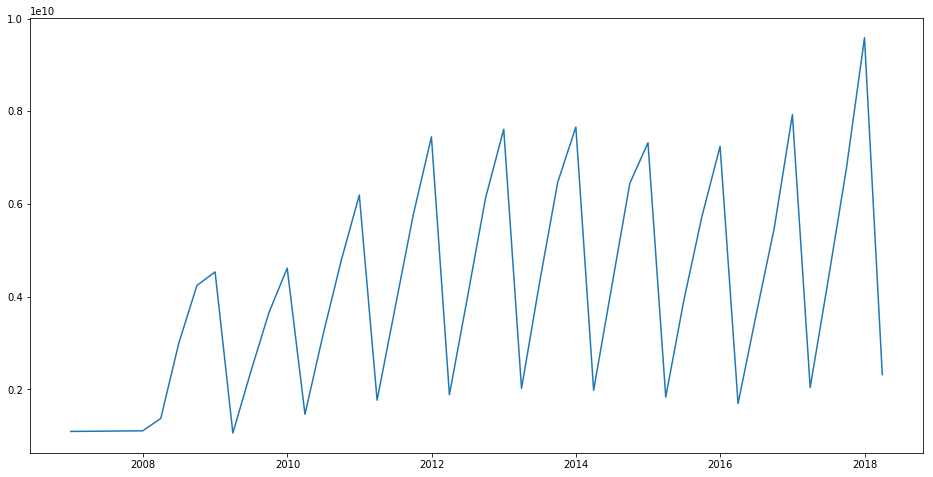

In [1978]:
#全市场营收平均值的时间序列图
fig = plt.figure(figsize=(16,8))
#Income.loc['2008':]['REVENUE'].groupby(Income.index).mean()
plt.plot(train['REVENUE'].groupby(train.index).mean())

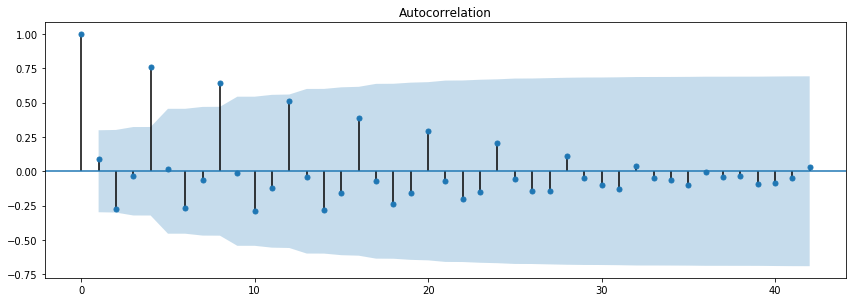

In [1979]:
#全市场营收平均值的acf值
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(train['REVENUE'].groupby(train.index).mean(),ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

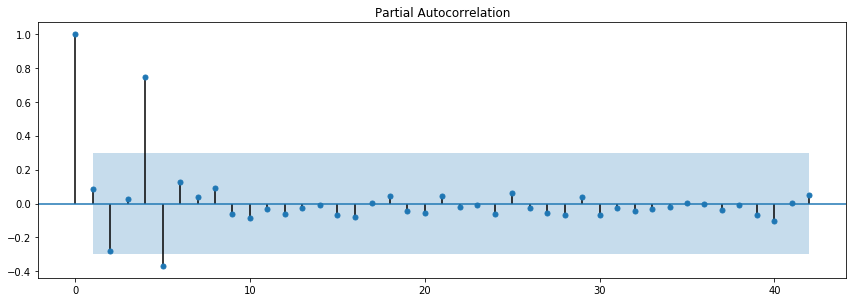

In [1980]:
#全市场营收平均值的pacf值
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_pacf(train['REVENUE'].groupby(train.index).mean(),ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

In [1981]:
#先预测包含最近两个完整年数据的公司
predict_each_stock=pd.DataFrame(columns=['TICKER_SYMBOL','REVENUE'])
for symbol in symbol_continuous:
    temp=train.loc[train['TICKER_SYMBOL']==symbol]['REVENUE']
    #temp=temp['2016':]#选取16年以来的
    #if(len(temp)==0):
        #continue
    #选取包含2018年一季度的
    if ((temp.index[-1]==pd.to_datetime('2018-03-31',format='%Y-%m-%d'))):
        #AR模型
        try:
            model = AR(temp)
            results_AR = model.fit(maxlag=8)
            predict_value = results_AR.predict(len(temp),len(temp))
            predict_each_stock=predict_each_stock.append({'REVENUE':predict_value.values[0],'TICKER_SYMBOL':symbol},ignore_index=True)
        except:
            continue
        #try:
        #ARMA模型
            #res=sm.tsa.arma_order_select_ic(temp, ic=['aic'])
            #arma_mod = ARMA(temp,order=res.aic_min_order)
            #print(symbol)
            #print(temp)
            #arma_mod = ARMA(temp,order=(6,8))
            #arma_res = arma_mod.fit()
            #print(arma_mod.params)
            #predict_value=arma_res.predict('2018-06',dynamic=True)
            #predict_each_stock=predict_each_stock.append({'REVENUE':predict_value.values[0],'TICKER_SYMBOL':symbol},ignore_index=True)
            #print(predict_value)
        #except:
            #continue

In [1982]:
predict_each_stock

,TICKER_SYMBOL,REVENUE
0,600186,9.217875e+08
1,000002,8.228179e+10
2,000004,2.610180e+08
3,000005,3.295325e+08
4,000006,9.408973e+08
5,000007,2.733879e+07
6,000008,5.435501e+08
7,000009,3.782475e+09
8,000010,1.107774e+08
9,000011,5.394823e+08


In [1983]:
predict_each_stock.sort_values(by='REVENUE',ascending=False)

,TICKER_SYMBOL,REVENUE
745,600028,1.269354e+12
1527,601857,1.022938e+12
802,600104,4.154760e+11
1518,601390,3.092160e+11
1516,601186,3.007569e+11
1298,600704,1.825192e+11
1213,600606,1.718055e+11
760,600057,1.537483e+11
739,600019,1.422795e+11
1513,601088,1.262372e+11


In [1984]:
for symbol in predict_each_stock['TICKER_SYMBOL']:
    idx=predict_each_stock.loc[predict_each_stock['TICKER_SYMBOL']==symbol].index
    this_year=predict_each_stock.loc[idx,'REVENUE']
    last_year=train.loc[train['TICKER_SYMBOL']==symbol]['2017-06']['REVENUE']
    growth_rate=(this_year.values[0]-last_year.values[0])/last_year.values[0]
    predict_each_stock.loc[idx,'GROWTH_RATE']=growth_rate

In [1985]:
predict_each_stock.sort_values(by='GROWTH_RATE')

,TICKER_SYMBOL,REVENUE,GROWTH_RATE
608,002164,-4.049580e+10,-123.485876
101,000505,-3.111610e+10,-80.007606
363,000892,-9.935353e+09,-40.103444
388,000923,-2.773871e+09,-21.341562
1565,601188,-2.135460e+09,-10.002816
430,000980,-4.061327e+10,-8.018511
104,000509,-4.872518e+09,-7.672342
1352,600760,-2.655156e+09,-5.849018
187,000615,-2.793914e+09,-5.160692
263,000727,-1.036011e+10,-4.504375


In [1986]:
predict_each_stock[['GROWTH_RATE']].describe()

,GROWTH_RATE
count,1573.000000
mean,0.060138
std,4.254087
min,-123.485876
25%,-0.049574
50%,0.055445
75%,0.198546
max,28.768460


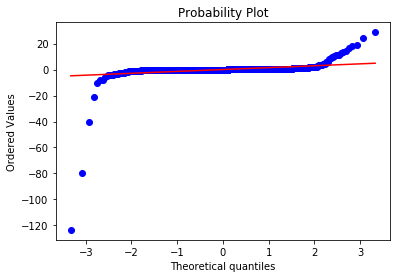

In [1987]:
import scipy.stats as stats
import pylab 
stats.probplot(predict_each_stock['GROWTH_RATE'], dist="norm", plot=pylab)
pylab.show()

In [1988]:
#看看上下5%分位数占多少，去掉上下5%分位数
len(predict_each_stock.loc[(predict_each_stock['GROWTH_RATE']<predict_each_stock['GROWTH_RATE'].quantile(0.95))&(predict_each_stock['GROWTH_RATE']>predict_each_stock['GROWTH_RATE'].quantile(0.05))])
predict_each_stock=predict_each_stock.loc[(predict_each_stock['GROWTH_RATE']<predict_each_stock['GROWTH_RATE'].quantile(0.95))&(predict_each_stock['GROWTH_RATE']>predict_each_stock['GROWTH_RATE'].quantile(0.05))]

In [1989]:
predict_each_stock.loc[(predict_each_stock['GROWTH_RATE']>5)|(predict_each_stock['REVENUE']<0)]

,TICKER_SYMBOL,REVENUE,GROWTH_RATE


In [1990]:
predict_each_stock.sort_values(by='GROWTH_RATE')

,TICKER_SYMBOL,REVENUE,GROWTH_RATE
1237,600636,1.634557e+09,-0.432888
689,002245,8.475492e+08,-0.430657
844,600153,5.224973e+10,-0.429804
405,000951,1.044363e+10,-0.429680
979,600311,5.906568e+07,-0.427698
1301,600707,1.109974e+08,-0.418930
882,600198,1.665938e+09,-0.417079
820,600123,2.364963e+09,-0.405020
268,000735,5.338499e+08,-0.396364
1280,600685,6.416397e+09,-0.384077


In [1991]:
predict_each_stock[['GROWTH_RATE']].describe()

,GROWTH_RATE
count,1415.000000
mean,0.093467
std,0.231098
min,-0.432888
25%,-0.033567
50%,0.055445
75%,0.171247
max,1.025435


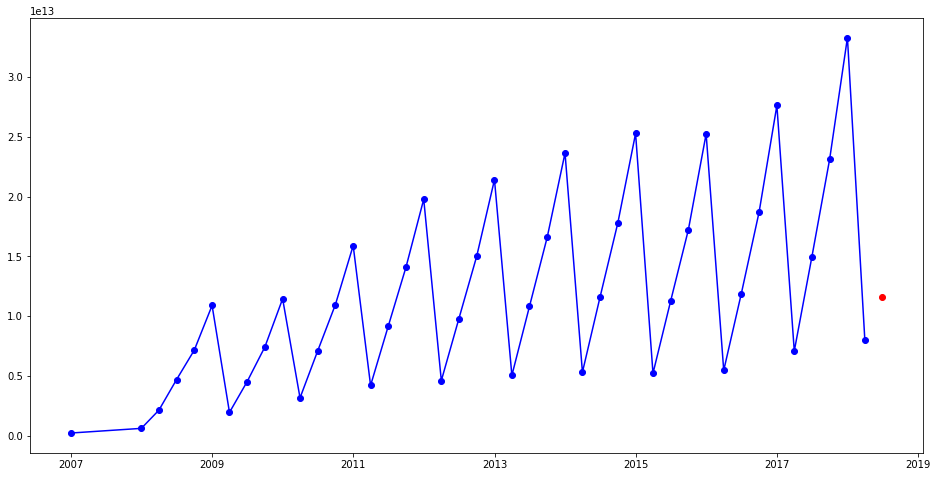

In [1992]:
#全市场营收平均值的时间序列图以及二季度营收的预测值
fig = plt.figure(figsize=(16,8))
#Income.loc['2008':]['REVENUE'].groupby(Income.index).mean()
plt.plot(train['REVENUE'].groupby(train.index).sum(),'bo-')
plt.plot(pd.to_datetime('2018-06-30',format='%Y-%m-%d'),predict_each_stock['REVENUE'].sum(),'ro')

In [1993]:
#predict_each_stock=predict_each_stock[predict_each_stock['REVENUE']>0]

In [1994]:
#还没有预测营收的股票代码
not_predicted_symbol=np.setdiff1d(train['TICKER_SYMBOL'].unique(),predict_each_stock['TICKER_SYMBOL'].unique())
len(not_predicted_symbol)

2080

In [1995]:
#对于还未预测的股票代码，看看哪些是有以往多个完整的6月份数据的，因为从自相关函数看，18年2季度与以往2季度相关性最大
#方法一，用最近几年二季度营收平滑
for symbol in not_predicted_symbol:
    temp=train.loc[(train['TICKER_SYMBOL']==symbol)&(train.index.month==6)]['REVENUE']
    try:
        growth_rate_list=(temp.shift(-1)-temp)/temp
        growth_rate_list=growth_rate_list.loc[(growth_rate_list<growth_rate_list.quantile(0.95))&(growth_rate_list>growth_rate_list.quantile(0.05))]
        growth_rate=np.mean(growth_rate_list)
        last_year=train.loc[train['TICKER_SYMBOL']==symbol]['2017-06']['REVENUE']
        if((len(growth_rate_list)>0)&(len(last_year)>0)):
            this_year=last_year.values[0]*(1+growth_rate)
            predict_each_stock=predict_each_stock.append({'REVENUE':this_year,'TICKER_SYMBOL':symbol,'GROWTH_RATE':growth_rate},ignore_index=True)
    except:
        continue

In [1996]:
growth_rate_list=growth_rate_list.loc[(growth_rate_list<growth_rate_list.quantile(0.95))&(growth_rate_list>growth_rate_list.quantile(0.05))]   
growth_rate_list

Series([], Name: REVENUE, dtype: float64)

In [1997]:
#方法二，用最近两年的AR。因为营收有异常的，往往是最近两年数据导致的
#for symbol in set(not_predicted_symbol).intersection(set(symbol_continuous)):
#    temp=train.loc[train['TICKER_SYMBOL']==symbol]['REVENUE'][-8:]
#    try:
#        arma_mod = AR(temp)
#        arma_res = arma_mod.fit()
#        predict_value=arma_res.predict(len(temp),len(temp))
#        this_year=predict_value
#        last_year=train.loc[train['TICKER_SYMBOL']==symbol]['2017-06']['REVENUE']
#        growth_rate=(this_year.values[0]-last_year.values[0])/last_year.values[0]
#        predict_each_stock=predict_each_stock.append({'REVENUE':predict_value.values[0],'TICKER_SYMBOL':symbol,'GROWTH_RATE':growth_rate},ignore_index=True)
#    except:
#        continue

In [1998]:
#测试方法一

temp=train.loc[(train['TICKER_SYMBOL']=='000004')&(train.index.month==6)]['REVENUE'] 
growth_rate_list=(temp.shift(-1)-temp)/temp
growth_rate_list=growth_rate_list.loc[(growth_rate_list<growth_rate_list.quantile(0.95))&(growth_rate_list>growth_rate_list.quantile(0.05))]
growth_rate=np.mean(growth_rate_list)
last_year=train.loc[train['TICKER_SYMBOL']==symbol]['2017-06']['REVENUE']
last_year.values[0]
this_year=last_year.values[0]*(1+growth_rate)
np.mean((temp.shift(-1)-temp)/temp)


0.2025138861745571

In [1999]:
predict_each_stock.sort_values(by='GROWTH_RATE')

,TICKER_SYMBOL,REVENUE,GROWTH_RATE
2600,601558,1.120160e+07,-0.544357
2724,603616,1.179771e+08,-0.494751
1115,600636,1.634557e+09,-0.432888
2246,300268,1.385523e+05,-0.432128
616,002245,8.475492e+08,-0.430657
753,600153,5.224973e+10,-0.429804
357,000951,1.044363e+10,-0.429680
871,600311,5.906568e+07,-0.427698
1170,600707,1.109974e+08,-0.418930
787,600198,1.665938e+09,-0.417079


In [2000]:
predict_each_stock[['GROWTH_RATE']].describe()

,GROWTH_RATE
count,2762.000000
mean,0.242347
std,3.724332
min,-0.544357
25%,0.012531
50%,0.107190
75%,0.230093
max,180.697083


In [2001]:
#测试用
#from statsmodels.tsa.arima_model import ARIMA
#print(temp.diff(1)[1:])

#temp=train.loc[train['TICKER_SYMBOL']=='600715']['REVENUE'][-12:]
#t=sm.tsa.stattools.adfuller(temp)
#print(t[1])
#arma_mod = AR(temp)
#arma_res = arma_mod.fit()
#print(arma_res.params)
#predict_value=arma_res.predict(len(temp),len(temp))
#print(predict_value)
#fig = plt.figure(figsize=(16,8))
#plt.plot(train.loc[train['TICKER_SYMBOL']=='600715']['REVENUE'],'bo-')
#plt.plot(pd.to_datetime('2018-06-30',format='%Y-%m-%d'),predict_value,'ro')

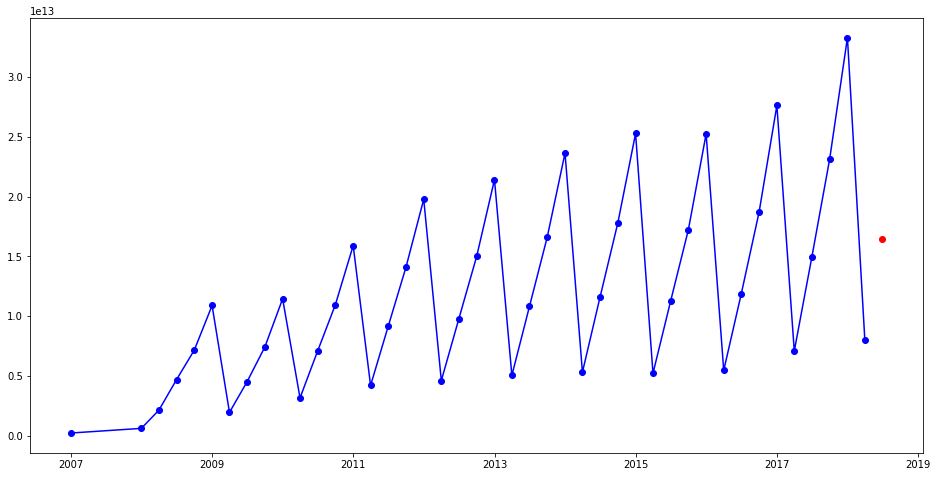

In [2002]:
#全市场营收平均值的时间序列图以及二季度营收的预测值
fig = plt.figure(figsize=(16,8))
#Income.loc['2008':]['REVENUE'].groupby(Income.index).mean()
plt.plot(train['REVENUE'].groupby(train.index).sum(),'bo-')
plt.plot(pd.to_datetime('2018-06-30',format='%Y-%m-%d'),predict_each_stock['REVENUE'].sum(),'ro')

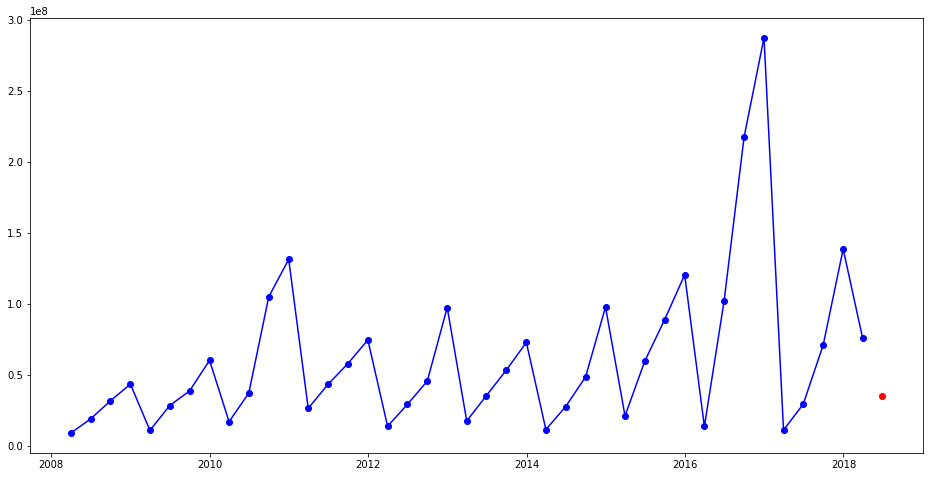

In [2003]:
#测试用
fig = plt.figure(figsize=(16,8))
#Income.loc['2008':]['REVENUE'].groupby(Income.index).mean()
plt.plot(train.loc[train['TICKER_SYMBOL']=='000004']['REVENUE'],'bo-')
#train.loc[predict_each_stock['TICKER_SYMBOL']=='600462']['REVENUE]
plt.plot(pd.to_datetime('2018-06-30',format='%Y-%m-%d'),predict_each_stock.loc[predict_each_stock['TICKER_SYMBOL']=='000004']['REVENUE'],'ro')